In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from datetime import datetime
from tqdm import tqdm
from pandas_datareader import data as web
import yfinance as yf
import curl_cffi # required as a workaround for yahoo finance not working on console python, but worked on browser
from curl_cffi import requests

****Download ticker data****

In [2]:
tickers = ['GDX','GLD','AAPL','GOOGL','META','AMD','NVDA','CSCO','ORCL','TTWO','EA','HYG','LQD','JNK','SLV','SIVR','USO',
           'UWT','QQQ','SPY','VOO','VDE','VTI','EMLP','VDC','FSTA','KXI','IBB','VHT','VNQ','IYR','MSFT','PG','TMF',
           'UPRO','WFC','JPM','GS','CVX','XOM','INTC','COST','WMT','T','VZ','CMCSA','AMZN']
# tickers = ['GDX','GLD','AAPL']

In [3]:
def get_data(tickers, ohlc, start_date=None, end_date=None):
    pre_data = []
    col_list = []

    # Workaround for yahoo finance not working on Python console
    session = requests.Session(impersonate="chrome")
    
    for ticker in tickers:
        df = yf.download(ticker, start=start_date, end=end_date, auto_adjust = True, session=session)
        df = df[ohlc]
        pre_data.append(df.astype('float'))
        col_list.append(ticker)

    data = pd.concat(pre_data, axis = 1)
    data = data.dropna(axis=1)

    return data

In [4]:
start_date = pd.Timestamp('2008-01-01')
end_date = pd.Timestamp('2023-12-31')

prices = get_data(tickers, 'Close', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
prices.head(10)

Ticker,GDX,GLD,AAPL,GOOGL,AMD,NVDA,CSCO,ORCL,TTWO,EA,...,GS,CVX,XOM,INTC,COST,WMT,T,VZ,CMCSA,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,42.922943,84.860001,5.849120,17.044674,7.14,0.756703,17.368879,18.060463,18.058884,55.239040,...,154.215576,46.556904,49.526455,15.450841,47.268433,10.803962,8.545543,16.196829,6.140189,4.8125
2008-01-03,44.230515,85.570000,5.851822,17.048157,6.77,0.750742,17.506311,18.558348,17.638910,54.635658,...,152.165405,47.129784,49.695953,15.036379,46.560856,10.684173,8.626829,16.271805,6.015304,4.7605
2008-01-04,43.498272,85.129997,5.405122,16.343424,6.25,0.687703,17.094019,17.691059,17.388926,53.049324,...,148.517975,46.502125,48.769093,13.817380,45.541130,10.532134,8.522616,15.968186,5.841853,4.4395
2008-01-07,42.766041,84.769997,5.332773,16.150639,6.08,0.616640,17.100567,17.867735,16.518980,52.582195,...,144.655151,45.894382,48.313599,13.945365,45.770054,10.725640,8.635166,16.249311,5.897357,4.4410
2008-01-08,44.282806,86.779999,5.140945,15.713569,6.00,0.629706,16.642456,16.984385,16.448984,52.066395,...,140.769958,45.306568,47.693932,13.567479,45.069412,10.589727,8.267721,15.897214,5.765535,4.3940
2008-01-09,44.570473,86.550003,5.385610,16.248896,5.53,0.662258,17.172552,17.353783,16.488981,51.823097,...,142.441422,46.113564,48.493679,13.866133,46.664913,10.803962,8.233940,16.078945,5.918174,4.2610
2008-01-10,45.346306,88.250000,5.344181,16.087950,5.96,0.648504,17.172552,17.409992,16.698969,52.280506,...,146.274597,45.779808,48.546661,13.738141,48.461601,11.149500,8.318396,16.449968,5.973677,4.2130
2008-01-11,45.694973,88.580002,5.184175,15.877003,6.25,0.620079,16.930414,16.944237,16.358990,51.443546,...,147.634018,45.167080,47.826340,13.402915,46.082214,10.992858,8.065036,16.090303,5.938986,4.0540
2008-01-14,46.479515,89.540001,5.366996,16.264318,6.41,0.661341,17.205271,17.715155,16.049007,51.891224,...,149.795700,45.286644,48.107033,14.067268,44.889046,10.981338,8.130491,16.275818,6.129782,4.1435


In [6]:
num_stocks = prices.shape[1]
print(num_stocks)

39


****Plot Normalized Price Series****

In [7]:
# Normalize prices to day 0
# prices = prices.apply(lambda x: x / x.iloc[0], axis = 0) # Column wise operation
prices = prices / prices.iloc[0] # Vectorised operation, more efficient

In [8]:
prices.head()

Ticker,GDX,GLD,AAPL,GOOGL,AMD,NVDA,CSCO,ORCL,TTWO,EA,...,GS,CVX,XOM,INTC,COST,WMT,T,VZ,CMCSA,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2008-01-03,1.030463,1.008367,1.000462,1.000204,0.948179,0.992123,1.007913,1.027568,0.976744,0.989077,...,0.986706,1.012305,1.003422,0.973175,0.985031,0.988912,1.009512,1.004629,0.979661,0.989195
2008-01-04,1.013404,1.003182,0.924092,0.958858,0.875350,0.908815,0.984175,0.979546,0.962901,0.960359,...,0.963054,0.998823,0.984708,0.894280,0.963458,0.974840,0.997317,0.985884,0.951413,0.922493
2008-01-07,0.996345,0.998939,0.911722,0.947548,0.851541,0.814905,0.984552,0.989329,0.914729,0.951903,...,0.938006,0.985770,0.975511,0.902563,0.968301,0.992751,1.010488,1.003240,0.960452,0.922805
2008-01-08,1.031682,1.022625,0.878926,0.921905,0.840336,0.832172,0.958177,0.940418,0.910853,0.942565,...,0.912813,0.973144,0.962999,0.878106,0.953478,0.980171,0.967489,0.981502,0.938983,0.913039


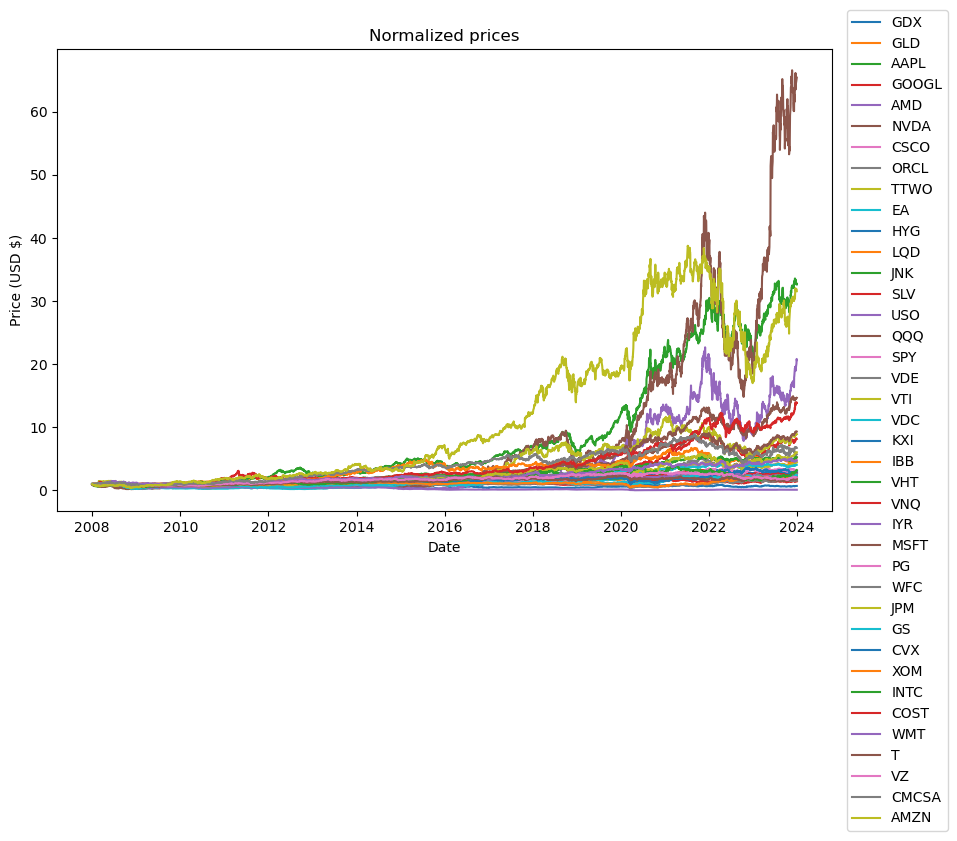

In [9]:
plt.figure(figsize=(10,6))
updated_tickers = prices.columns # Some stocks may have been dropped, so have to use the new columns from the dataframe
for ticker in updated_tickers:
    plt.plot(prices.index, prices[ticker],label=ticker) # plot(x_values, y_values, label)
plt.title("Normalized prices")
plt.xlabel('Date')
plt.ylabel('Price (USD $)')
plt.legend(bbox_to_anchor=(1.01,1.1),loc='upper left',ncol=1)
plt.show()

****Find Cointegrated Series****

Select pairs for p-values < 0.005 in the Engler-Granger 2-step method for determining pairs.

In [12]:
def find_cointegrated_pairs(dataframe, significance_level=0.005):
    n = dataframe.shape[1] # total number of stocks in the pool
    keys = dataframe.columns # Get the stock ticker
    pvalue_matrix = pd.DataFrame(np.ones((n,n)), columns = updated_tickers, index = updated_tickers) # dataframe to store p-values for each pair so we dont have to manually set the axis labels in the heatmap
    pairs = [] # initialize a list to store selected pairs

    total_pairs = n * (n-1) // 2 # the total number of unique pairs for cointegration test, used to tqdm progress track

    with tqdm(total = total_pairs, desc = 'Testing cointegration pairs') as pbar:
        for i in range(n):
            for j in range(i+1, n):
                stock1 = dataframe[keys[i]] # obtain the price series for stock 1
                stock2 = dataframe[keys[j]] # obtain the price series for stock 2
                res = sm.tsa.stattools.coint(stock1, stock2)
    
                pvalue = res[1] # get the p-value from the cointegration test
                pvalue_matrix.iloc[i,j] = pvalue
                pvalue_matrix.iloc[j,i] = pvalue
                if pvalue < significance_level:
                    pairs.append((keys[i], keys[j], pvalue))

                pbar.update(1) # update the tqdm progress bar after each iteration

    return pvalue_matrix, pairs

In [13]:
# Split the time series to 80% for training and 20% for testing
split = int(prices.shape[0] * 0.8)

In [14]:
# Run function to find cointegrated pairs
pvalue_matrix, pairs = find_cointegrated_pairs(prices[:split],0.005)

Testing cointegration pairs: 100%|████████████| 741/741 [01:08<00:00, 10.86it/s]


In [15]:
sorted_pairs_pvalue = sorted(pairs, key = lambda x: x[2]) # Sort the pairs by their p-values in ascending order

In [16]:
sorted_pairs_pvalue

[('ORCL', 'VTI', 0.0005259164514045334),
 ('ORCL', 'SPY', 0.0010107588377644447),
 ('ORCL', 'VZ', 0.0014481477422332615),
 ('ORCL', 'VHT', 0.0016762341604995078),
 ('ORCL', 'CMCSA', 0.002670890524073608),
 ('ORCL', 'VDC', 0.0031085555753940213),
 ('ORCL', 'IYR', 0.0037658154197742592),
 ('IYR', 'CMCSA', 0.0038861468419696932)]

In [17]:
pvalue_matrix.shape

(39, 39)

In [18]:
pvalue_matrix

Ticker,GDX,GLD,AAPL,GOOGL,AMD,NVDA,CSCO,ORCL,TTWO,EA,...,GS,CVX,XOM,INTC,COST,WMT,T,VZ,CMCSA,AMZN
Ticker,,,,,,,,,,,,,,,,,,,,,
GDX,1.000000,0.517960,0.724550,0.585280,0.559685,0.667684,0.427229,0.504249,0.606683,0.435348,...,0.212669,0.186849,0.099613,0.481985,0.698608,0.686270,0.282546,0.483168,0.465043,0.683991
GLD,0.517960,1.000000,0.449100,0.672038,0.412036,0.487058,0.769603,0.620949,0.669171,0.781725,...,0.821994,0.888495,0.801624,0.680844,0.590046,0.547023,0.756627,0.666421,0.737109,0.551546
AAPL,0.724550,0.449100,1.000000,1.000000,0.506731,0.319571,1.000000,0.992806,0.985413,0.990502,...,1.000000,1.000000,1.000000,0.980980,0.888384,0.378472,1.000000,1.000000,1.000000,0.388450
GOOGL,0.585280,0.672038,1.000000,1.000000,0.868679,0.966376,0.727595,0.041181,0.212739,0.232433,...,0.608903,0.993868,1.000000,0.009701,0.081689,0.203968,0.923596,0.228048,0.573156,0.703443
AMD,0.559685,0.412036,0.506731,0.868679,1.000000,0.719659,1.000000,1.000000,0.993523,1.000000,...,1.000000,1.000000,1.000000,0.991746,0.951337,0.968414,1.000000,1.000000,1.000000,0.930196
NVDA,0.667684,0.487058,0.319571,0.966376,0.719659,1.000000,1.000000,0.993565,0.993037,1.000000,...,1.000000,1.000000,1.000000,0.985975,0.989887,0.874533,1.000000,1.000000,1.000000,0.693697
CSCO,0.427229,0.769603,1.000000,0.727595,1.000000,1.000000,1.000000,0.390637,0.250731,0.337482,...,0.363721,0.916910,0.989163,0.060894,0.854202,0.635791,0.668931,0.398433,0.368306,0.986236
ORCL,0.504249,0.620949,0.992806,0.041181,1.000000,0.993565,0.390637,1.000000,0.189299,0.197966,...,0.332821,0.976030,1.000000,0.033142,0.085064,0.061174,0.272146,0.001448,0.002671,0.558613
TTWO,0.606683,0.669171,0.985413,0.212739,0.993523,0.993037,0.250731,0.189299,1.000000,0.575679,...,0.682541,0.993535,1.000000,0.031506,0.500432,0.523564,0.987677,0.866872,0.926523,0.404768


In [19]:
# Plot a heatmap to show p-values of pairs

def plot_coint_heatmap(pvalue_matrix, significance_level=0.0015):
    plt.figure(figsize=(5, 3))
    sns.heatmap(pvalue_matrix, annot=False, fmt=".1f", cmap='Reds_r', 
                )
    plt.title(f'Cointegration Test P-Value Heatmap (p < {significance_level})')
    plt.show()

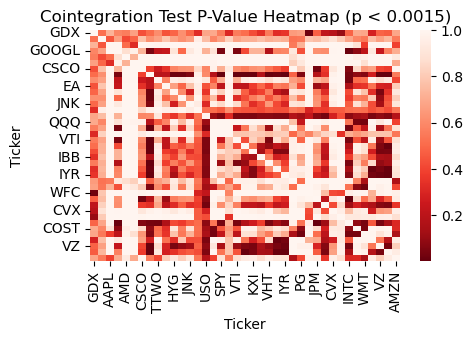

In [20]:
plot_coint_heatmap(pvalue_matrix)

****Define Trading Pairs****

In [22]:
# Define trading pairs
trading_pairs = [['ORCL','VTI'],['ORCL','SPY'],['IYR','CMCSA']]
# for pair in sorted_pairs_pvalue[7:8]:
#     trading_pairs.append(pair)


In [23]:
print(f'Trading pairs are: {trading_pairs}')

Trading pairs are: [['ORCL', 'VTI'], ['ORCL', 'SPY'], ['IYR', 'CMCSA']]


****Define function to perform regression to obtain hedge ratio, beta****

In [145]:
# Regress to obtain the hedge ratio, beta
def regression(y, x):
    """
    y: pandas series of stock1 prices
    x: pandas series of stock2 prices (regressor)
    """
    X = sm.add_constant(x) # To be consistent with the regression used in the 2-step Engle-Granger method
    model = sm.OLS(y,X)
    result = model.fit()
    beta = result.params.iloc[1] # extract the estimated coefficient
    intercept = result.params.iloc[0]
    beta_var = result.cov_params().iloc[1,1] # extract the variance of the estimated coefficient
    ssr = result.scale # extract the (standard error)^2 of the regression.
    # In OLSResults.scale(), the value is (sum of squared residual) / (n - k)

    return beta, beta_var, ssr

****Define trading strategy function****

In [186]:
# Trading strategy
def trading(df, s1, s2, split, kf_IO = 0, z_long_entry = -1, z_long_exit = 1, z_short_entry = 1, z_short_exit = -1):
    """
    df: pandas dataframe of prices
    s1: stock 1, dtype = str
    s2: stock 2, dtype = str
    beta: hedge ratio
    split: split ratio for training (to estimate beta) and testing
    kf_IO: switch to turn Kalman Filter On or Off
    
    Outputs:
    cummulative returns
    CAGR
    """
    ################################################
    ## Split dataset to estimate hedge ratio beta ##
    ################################################
    split = int(df.shape[0] * 0.7)
    df_train = df.iloc[:split, :]
    df_test = df.iloc[split:,:]

    ## Estimating hedge ratio beta using training set
    x_train = df_train[s1] # Regressor
    y_train = df_train[s2] # Independent

    beta_init, P_init , R_init = regression(y_train,x_train)

    ################################################
    ## Using testing data, compute the spreads ##
    ################################################
    x = df_test[s1]
    y = df_test[s2]

    df1 = pd.concat([x,y],axis = 1)
    df1.columns = ['x','y']

    # Compute beta
    if kf_IO ==1:
        # Predict beta at each time step using Kalman Filter
        beta_df = KalmanFilter(x, y, beta_init, P_init, R_init)
        df1 = pd.concat([df1, beta_df], axis = 1)
    else:
        # assume constant beta
        df1['beta'] = beta
        

    df1['spread'] = df1['y'] - df1['beta'] * df1['x']
    ## We use 100 period rolling window to compute the mean and std of spread
    df1['spread_mean'] = df1.spread.rolling(window = 100).mean()
    df1['spread_std'] = df1.spread.rolling(window = 100).std()
    df1['zscore'] = (df1['spread'] - df1['spread_mean']) / df1['spread_std']

    ################################################
    ## Execute trading strategy ##
    ################################################
    
    ## Long
    df1['long_entry'] = (
        (df1.zscore < z_long_entry) &
        (df1.zscore.shift(1) > z_long_entry)
    ) # Returns Boolean series
    df1['long_exit'] = (
        (df1.zscore > z_long_exit) &
        (df1.zscore.shift(1) < z_long_exit)
    ) # Returns Boolean series
    df1['long_pos'] = np.nan
    df1.loc[df1['long_entry'],'long_pos'] = 1 # Denote the column 'long_pos' = 1 to indicate enter long position
    df1.loc[df1['long_exit'],'long_pos'] = 0 # Denote the column 'long_pos' = 0 to indicate exit long position
    df1.loc[df1.index[0],'long_pos'] = 0 # to ensure no position at the start
    df1['long_pos'] = df1['long_pos'].ffill()

    ## Short
    df1['short_entry'] = (
        (df1.zscore > z_short_entry) &
        (df1.zscore.shift(1) < z_short_entry)
    ) # Returns Boolean series
    df1['short_exit'] = (
        (df1.zscore < z_short_exit) &
        (df1.zscore.shift(1) > z_short_exit)
    ) # Returns Boolean series
    df1['short_pos'] = np.nan
    df1.loc[df1['short_entry'],'short_pos'] = -1 # Denote the column 'short_pos' = -1 to indicate enter short position
    df1.loc[df1['short_exit'],'short_pos'] = 0 # Denote the column 'short_pos' = 0 to indicate exit short position
    df1.loc[df1.index[0],'short_pos'] = 0 # to ensure no position at the start
    df1['short_pos'] = df1['short_pos'].ffill()

    ################################################
    ## Computing Returns, we assumed only 1 open position at any one time ##
    ################################################
    df1['pos'] = df1['long_pos'] + df1['short_pos']
    df1['spread_chg'] = df1['spread'] - df1['spread'].shift(1)
    df1['notional'] = df1['y'] + abs(df1['beta'] * df1['x'])
    df1['net_ret'] = df1['spread_chg'] / df1['notional'].shift(1) * df1['pos'].shift(1)
    df1['net_ret'].fillna(0)
    df1['equity'] = 1 * (1 + df1['net_ret']).cumprod() # Assumed initial equity value of 1

    ################################################
    ## Compute return statistics #############
    ################################################
    start_date = df1.index[0]
    end_date = df1.index[-1]
    days = (end_date - start_date).days
    CAGR = (df1['equity'].iloc[-1] / 1)**(252/days) - 1 # Assumed initial equity of 1
    df1['cum_ret'] = (1 + df1['net_ret']).cumprod() - 1

    
    return df1, CAGR

In [188]:
beta1, CAGR = trading(prices, 'IYR', 'CMCSA', 0.7, kf_IO = 0)
CAGR

-0.0013325764889815517

In [172]:
beta1.head()

,x,y,beta,spread,spread_mean,spread_std,zscore,long_entry,long_exit,long_pos,short_entry,short_exit,short_pos,pos,spread_chg,notional,net_ret,equity,cum_ret
Date,,,,,,,,,,,,,,,,,,,
2019-03-14,2.095507,5.499742,3.197691,-1.201041,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,NaN,12.200525,NaN,NaN,NaN
2019-03-15,2.090646,5.582506,3.197691,-1.102733,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.098308,12.267744,0.0,1.0,0.0
2019-03-18,2.078978,5.506640,3.197691,-1.141290,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,-0.038557,12.154570,-0.0,1.0,0.0
2019-03-19,2.072901,5.487327,3.197691,-1.141170,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.000120,12.115824,0.0,1.0,0.0
2019-03-20,2.079829,5.444567,3.197691,-1.206084,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,-0.064915,12.095218,-0.0,1.0,0.0


In [174]:
print(f'Equity: {beta1.loc[beta1.index[-1],"equity"]}')

Equity: 0.9907773259263206


Text(0.5, 1.0, 'Z-score vs spread')

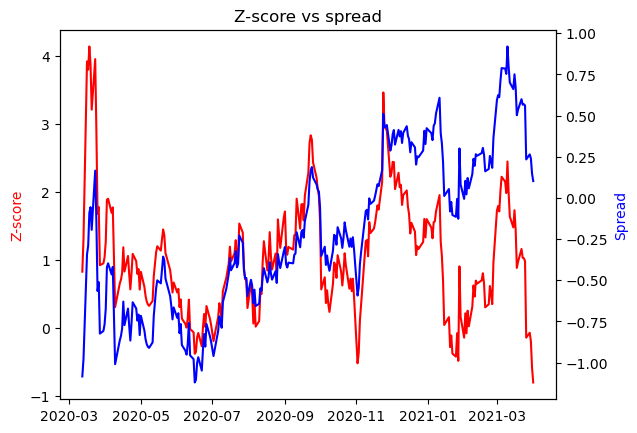

In [209]:
fig, ax1 = plt.subplots()
ax1.plot(beta1.loc['2020-03-12':'2021-04-01','zscore'],color = 'r',label = 'Z-score')
ax1.set_ylabel('Z-score',color = 'r')
ax2 = ax1.twinx()
ax2.plot(beta1.loc['2020-03-12':'2021-04-01','spread'],color='b',label = 'Spread')
ax2.set_ylabel('Spread',color = 'b')
plt.title('Z-score vs spread')

In [178]:
beta1['pos_chg'] = beta1['pos'] != beta1['pos'].shift()
poschange = beta1.loc[beta1['pos_chg'],['pos','equity']]
poschange

,pos,equity
Date,,
2019-03-14,0.0,NaN
2019-08-07,1.0,1.000000
2019-09-10,-1.0,1.036514
2019-09-26,1.0,1.066896
2019-11-12,-1.0,1.091921
2019-11-20,1.0,1.119610
2020-01-17,-1.0,1.140623
2020-01-23,1.0,1.167688
2020-03-13,-1.0,1.201910


****Analysis****

Using a constant hedge ratio can sometimes give a false signal, as shown in the chart above. The Z-score is above the value of 1, which signals a short position around 2020-03-12, however, the absolute spread values seems to be trending updwards, in opposite direction to the short signal.

This could be due to several reasons:
1. We used a 100-day rolling window to compute the spread mean and standard deviation, which can cause the rolling mean to also trend updwards, keeping the z-score in the sell signal region. 
2. Given a constant hedge ratio, the cointegration relationship between the two stocks may fail and using the constant hedge ratio does not guarantee spread stationarity anymore.

Next, let us try to use Kalman filter to dynamically update the hedge ratio and test if this can improve our pair trading strategy performance.

****Kalman Filter****

For a hidden state such as the hedge ratio that could change over time, we can estimate the next step state variable values using a Kalman Filter.

Kalman filter system uses a state space model to model the hidden state, and then infer information about the state using observable data.
The state equation:
$$ x_{t+1} = Ax_t + Bu_t + w_t, \quad w_t \sim N(0,Q)$$

where x_t is the hidden state of interest, A relates the states at previous time step, B is the control input dynamics, $u_t$ is a control input, and $w_t$ is the process noise.

The measurement equation:
$$ z_t = Hx_t + v_t, \quad v_t \sim N(0,R) $$

where H is the dynamics between state variable $x_t$ and measurement (observable data) $z_t$, and $v_k$ is the measurement noise.

Our hidden state of interest in pair trading is the hedge ratio, $\beta$. Our Kalman filter setup is:

State equation:
$$ \beta_{t+1} = \beta_t + w_t, \quad w_t \sim N(0,Q)$$
Measurement:
$$ p^{(2)}_t = p^{(1)}_t \times \beta + v_t, \quad v_t \sim N(0,R)$$
where $p^{(2)}_t$ is the price of asset 2, and $p^{(1)}_t$ is the price of asset 1.

Algorithm using a Kalman filter to predict $\beta_{t+1}$:
1. Predict the hedge ratio a priori
$$\hat{\beta}_{t | t-1} = \hat{\beta}_{t-1 | t-1}$$
$$ P_{t | t-1} = P_{t-1 | t-1} + Q $$

where $P_{t|t} = Var(\epsilon_t)$ is the variance of the prediction error $\epsilon_t = \beta_{t|t} - \hat{\beta}_{t|t}$.

We can use a discount factor version for the prediction error variance, i.e.
$$ P_{t | t-1} = P_{t-1 | t-1} + Q \Leftrightarrow P_{t | t-1} = \frac{1}{\delta} P_{t-1 | t-1}$$ where $Q_t = (\frac{1}{\delta} - 1)P_{t-1|t-1}$, and the discount factor $\delta \in (0,1]$.

2. Update the prediction using observed data (measurement)
$$K_t = \frac{P_{t|t-1} \times p^{(1)}_t}{p^{(2)}_t \times p^{(2)}_t \times P_{t|t-1} + R} $$
$$ \hat{\beta}_{t|t} = \hat{\beta}_{t|t-1} + K_t(p^{(2)}_t - p^{(1)}_t\hat{\beta}_{t|t-1}) $$
$$ P_{t|t} = 1 - K_t p^{(1)}_t P_{t|t-1} $$

Initialization:
$$\beta_{0|0} = \hat{\beta}_{OLS}$$ is the regression coefficient of $p^{(2)}_t = \beta p^{(2)}_t + e_t$
$$P_{0|0} \approx \frac{\hat{\sigma}^2}{\sum (p^{(1)}_t)^2} $$
where $\hat{\sigma}^2 = $ is the (standard error)$^2$ of regression residual (refer appendix for derivation).
$$R \approx \hat{\sigma}^2$$
$$Q = Var(\hat{\beta}_t)$$
where Q is computed by first regressing $p^{(2)}_t = \beta p^{(2)}_t + e_t$ using a rolling window and create a series for $\hat{\beta}$ and then compute the empirical variance of the estimated $\beta$'s.

However, we would use the discount factor form for $P_{t | t-1}$, hence we would just need to specify $\delta$ and ignore the need to compute $Q$ exclusively.


More information about Kalman Filter can be found from Welch and Bishop (2006) 'An Introduction to the Kalman Filter".

****Appendix****

Derivation of the initialization of $P_{0|0}$. From the measurement equation, we have that
$$z = H\beta + \epsilon, \epsilon \sim N(0, \sigma^2 I_N)$$
Suppose $z \in \mathbb{R}^N, H \in \mathbb{R}^{N \times k}, \beta \in \mathbb{R}^k$, then the OLS estimator has the solution $$\hat{\beta}_{OLS} = (H^TH)^{-1}H^Tz$$

Because $z = H\beta + \epsilon$, and $E[\epsilon]=0, Var(\epsilon) = \sigma^2 I$, we have that 

$$P_{0|0} = Var(\beta - \hat{\beta}_{OLS}) = Var(\hat{\beta}_{OLS}) = Var((H^TH)^{-1}H^Tz) = (H^TH)^{-1}H^TVar(z)H(H^TH)^{-1} $$

And $Var(z) = Var(H\beta + \epsilon) = \sigma^2I$, so
$$P_{0|0} = Var(\hat{\beta}_{OLS}) = \sigma^2(H^TH)^{-1} $$

And we estimate the i.i.d noise variance using empirical variance of the OLS residuals $\hat{\epsilon} = z - H\beta_{OLS}$, and we get that 
$$\sigma^2 \approx \hat{\sigma}^2 = \frac{Var(\hat{\epsilon})}{n-1} $$

For a pair trading, $H_t = p_t^{(1)} \Rightarrow H^TH = \sum (p^{(1)}_t)^2$, and we get that
$$P_{0|0} = \sigma^2(H^TH)^{-1} = \frac{\hat{\sigma}^2}{\sum (p^{(1)}_t)^2}$$

****Implementation of the Kalman Filter****

In [36]:
################################################
## Initialize the Kalman system ##
################################################

## Define a kalman filter function to estimate hedge ratio
def KalmanFilter(x, y, beta_init, P_init, R_init):
    """
    x,y: pandas Series of asset prices
    beta_init: initialized hedge ratio, beta_0
    P_init: initialized beta variance, P_0
    R_init: initialized (standard error)^2
    """
    ## Initialize list to store hedge ratio
    beta_df = pd.DataFrame(index = x.index) # Create a new Series with same index
    beta_df['beta'] = np.nan

    ## Initialize Kalman parameters
    beta = beta_init
    P = P_init
    R = R_init
    delta = 0.998
    
    for i in range(len(x)):
        ## Predict step
        beta_pred = beta
        P_pred = P / delta
    
        ## Update step
        K = P_pred * x.iloc[i] / ( y.iloc[i] * y.iloc[i] * P_pred + R )
        beta = beta_pred + K * (y.iloc[i] - x.iloc[i] * beta_pred)
        P = 1 - K * x.iloc[i] * P_pred

        beta_df.iloc[i] = beta

    return beta_df

In [45]:
## Testing the Kalman Filter Function
split = int(prices.shape[0] * 0.7)
df_train = prices.iloc[:split, :]
df_test = prices.iloc[split:,:]

## Estimating hedge ratio beta using training set
x_train = df_train['IYR'] # Regressor
y_train = df_train['CMCSA'] # Independent

beta_init, P_init , R_init = regression(y_train,x_train)

In [46]:
## Predict beta using testing set
x_test = df_test['IYR']
y_test = df_test['CMCSA']

In [47]:
beta_df = KalmanFilter(x_test, y_test, beta_init, P_init, R_init)

In [48]:
beta_df.head()

,beta
Date,
2019-03-14,3.530748
2019-03-15,3.410804
2019-03-18,3.302978
2019-03-19,3.210072
2019-03-20,3.124283


In [108]:
## Compute the true beta using rolling window regression
beta_true = pd.DataFrame(index = x_test.index)
beta_true['beta_true'] = np.nan
j=0
for i in range(split,prices.shape[0]):
    xb = prices['IYR'].iloc[i-split:i]
    yb = prices['CMCSA'].iloc[i-split:i]
    beta ,_ ,_ = regression(yb,xb)
    beta_true.iloc[j,0] = beta
    j += 1

Text(0.5, 1.0, 'True beta vs Kalman Filter predicted beta')

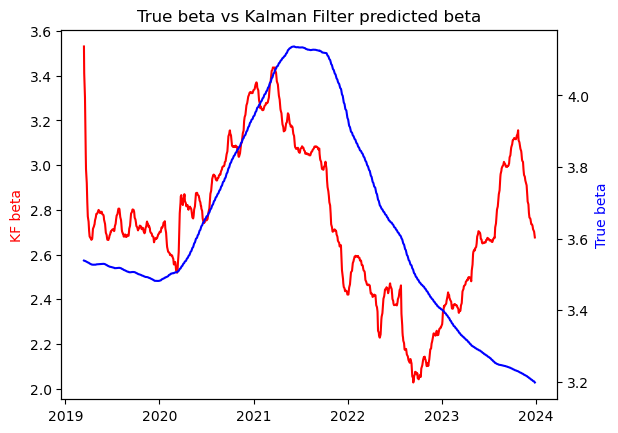

In [114]:
fig, ax1 = plt.subplots()
ax1.plot(beta_df,color = 'r',label = 'KF beta')
ax1.set_ylabel('KF beta',color = 'r')
ax2 = ax1.twinx()
ax2.plot(beta_true['beta_true'], color='b',label = 'True beta')
ax2.set_ylabel('True beta',color = 'b')
plt.title('True beta vs Kalman Filter predicted beta')

****Implement Kalman Filter into our pair trading strategy****

In [190]:
kf_df, CAGR = trading(prices, 'IYR', 'CMCSA', 0.7, kf_IO = 1)
CAGR

0.21061064223528692

In [194]:
print(f'Equity: {kf_df.loc[kf_df.index[-1],"equity"]}')

Equity: 3.77354413826932


In [196]:
kf_df.iloc[0:50,:]

,x,y,beta,spread,spread_mean,spread_std,zscore,long_entry,long_exit,long_pos,short_entry,short_exit,short_pos,pos,spread_chg,notional,net_ret,equity,cum_ret
Date,,,,,,,,,,,,,,,,,,,
2019-03-14,2.095507,5.499742,3.530748,-1.898963,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,NaN,12.898448,NaN,NaN,NaN
2019-03-15,2.090646,5.582506,3.410804,-1.548277,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.350686,12.713288,0.0,1.0,0.0
2019-03-18,2.078978,5.506640,3.302978,-1.360181,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.188096,12.373461,0.0,1.0,0.0
2019-03-19,2.072901,5.487327,3.210072,-1.166834,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.193346,12.141489,0.0,1.0,0.0
2019-03-20,2.079829,5.444567,3.124283,-1.053408,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.113426,11.942542,0.0,1.0,0.0
2019-03-21,2.115081,5.524570,3.049735,-0.925866,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.127542,11.975006,0.0,1.0,0.0
2019-03-22,2.102351,5.443186,2.981527,-0.825031,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.100835,11.711404,0.0,1.0,0.0
2019-03-25,2.102841,5.404563,2.919716,-0.735134,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.089897,11.544261,0.0,1.0,0.0
2019-03-26,2.118508,5.466637,2.869136,-0.611649,NaN,NaN,NaN,False,False,0.0,False,False,0.0,0.0,0.123485,11.544924,0.0,1.0,0.0


Text(0.5, 1.0, 'Z-score vs spread')

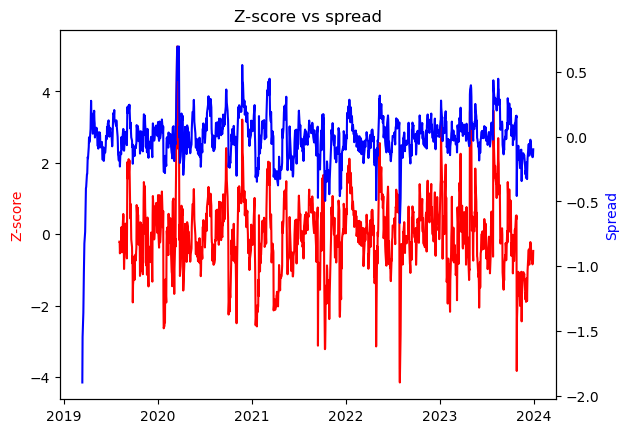

In [207]:
fig, ax1 = plt.subplots()
ax1.plot(kf_df.loc[:,'zscore'],color = 'r',label = 'Z-score')
ax1.set_ylabel('Z-score',color = 'r')
ax2 = ax1.twinx()
ax2.plot(kf_df.loc[:,'spread'],color='b',label = 'Spread')
ax2.set_ylabel('Spread',color = 'b')
plt.title('Z-score vs spread')

****Analysis****

Comparing to the constant hedge ratio that we used before, the dynamic hedge ratio using Kalman Filter now gives a better trading signal, as can be seen from the chart above. The Z-score traces the spread changes quite well.

Text(0.5, 1.0, 'Constant beta Equity vs Kalman Filter beta Equity')

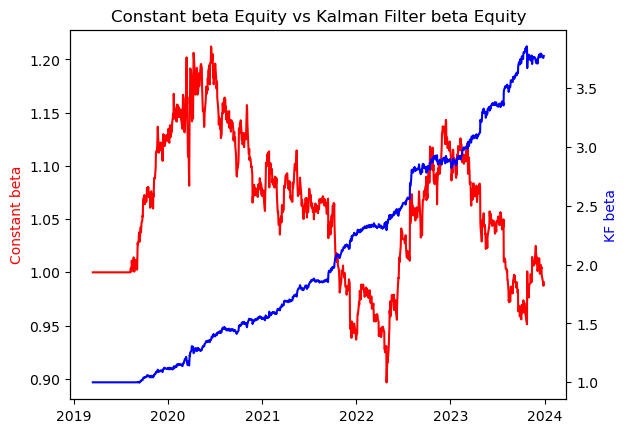

In [205]:
fig, ax1 = plt.subplots()
ax1.plot(beta1.loc[:, 'equity'],color = 'r',label = 'Constant beta equity')
ax1.set_ylabel('Constant beta',color = 'r')
ax2 = ax1.twinx()
ax2.plot(kf_df.loc[:,'equity'], color='b',label = 'KF beta equity')
ax2.set_ylabel('KF beta',color = 'b')
plt.title('Constant beta Equity vs Kalman Filter beta Equity')

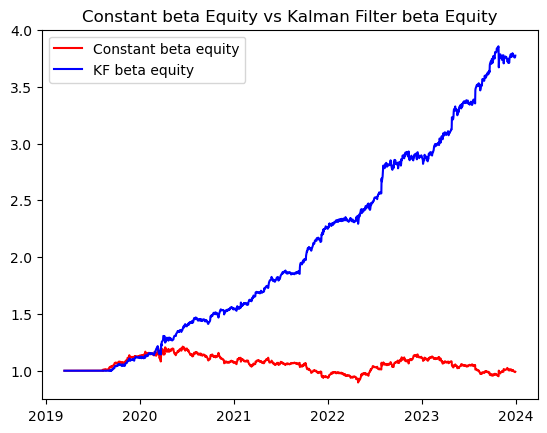

In [215]:
plt.plot(beta1.loc[:, 'equity'],color = 'r',label = 'Constant beta equity')
plt.plot(kf_df.loc[:,'equity'], color='b',label = 'KF beta equity')
plt.title('Constant beta Equity vs Kalman Filter beta Equity')
plt.legend()

In [217]:
kf_df['pos_chg'] = kf_df['pos'] != kf_df['pos'].shift()
poschange = kf_df.loc[kf_df['pos_chg'],['pos','equity']]
poschange

,pos,equity
Date,,
2019-03-14,0.0,NaN
2019-09-05,-1.0,1.000000
2019-09-26,1.0,1.034483
2019-11-08,-1.0,1.066594
2019-11-20,1.0,1.091632
2019-12-13,-1.0,1.111876
2020-01-23,1.0,1.135808
2020-03-02,-1.0,1.161728
2020-03-05,1.0,1.188199
